In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [2]:
df = pd.read_csv("E:/python/Emotion Detection/val.csv")

In [3]:
df.head()

,Emotion,Text
0,sadness,im feeling quite sad and sorry for myself but ...
1,sadness,i feel like i am still looking at a blank canv...
2,love,i feel like a faithful servant
3,anger,i am just feeling cranky and blue
4,joy,i can have for a treat or if i am feeling festive


In [4]:
df.shape

(2000, 2)

In [5]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [6]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
df['Emotion'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Emotion, dtype: int64

<AxesSubplot:>

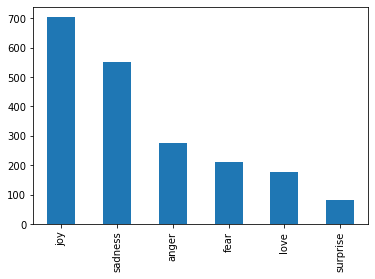

In [8]:
df['Emotion'].value_counts().plot(kind='bar')

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

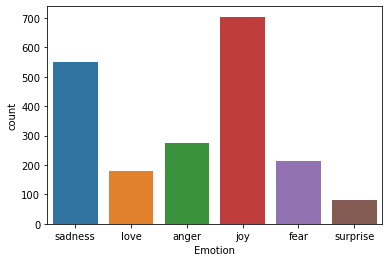

In [9]:
sns.countplot(df['Emotion'])

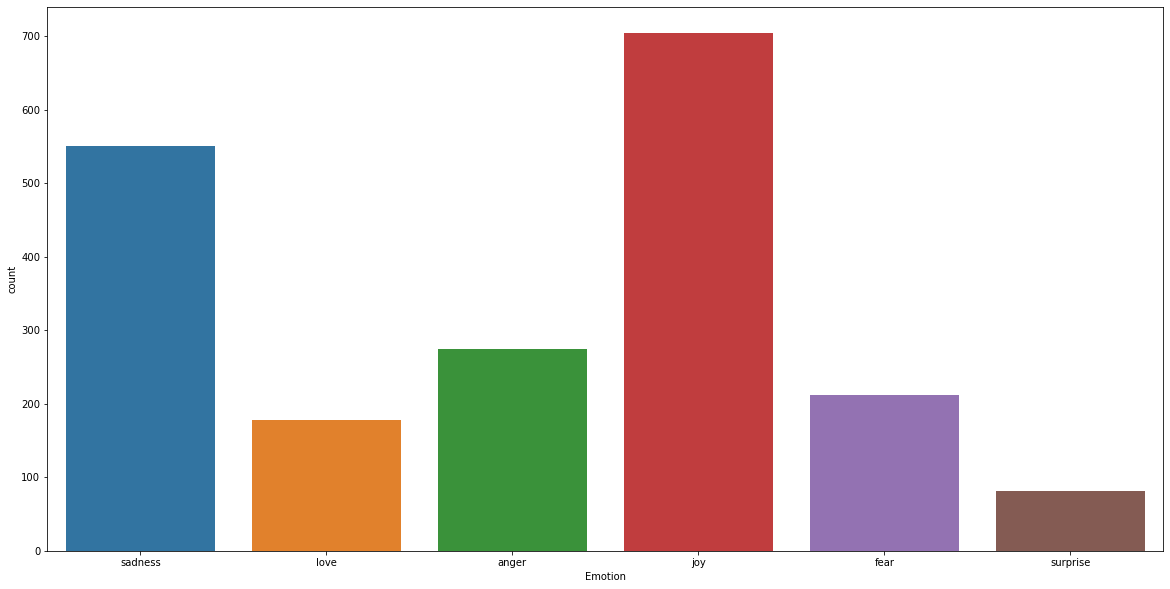

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment =blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else :
        result = 'Neutral'
    return result

In [13]:
get_sentiment("he is good")

'Positive'

In [14]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [15]:
df.head()

,Emotion,Text,Sentiment
0,sadness,im feeling quite sad and sorry for myself but ...,Negative
1,sadness,i feel like i am still looking at a blank canv...,Neutral
2,love,i feel like a faithful servant,Neutral
3,anger,i am just feeling cranky and blue,Neutral
4,joy,i can have for a treat or if i am feeling festive,Neutral


In [16]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     131
          Neutral       66
          Positive      78
fear      Negative      89
          Neutral       48
          Positive      75
joy       Negative      84
          Neutral       93
          Positive     527
love      Negative      40
          Neutral       27
          Positive     111
sadness   Negative     282
          Neutral      119
          Positive     149
surprise  Negative      30
          Neutral        9
          Positive      42
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

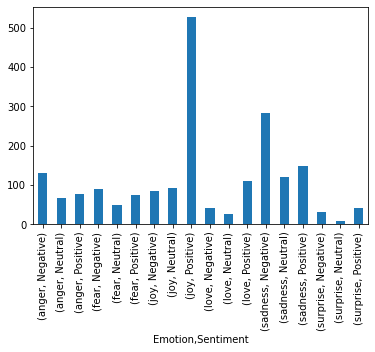

In [17]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [18]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x000001B0F9BD1310>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


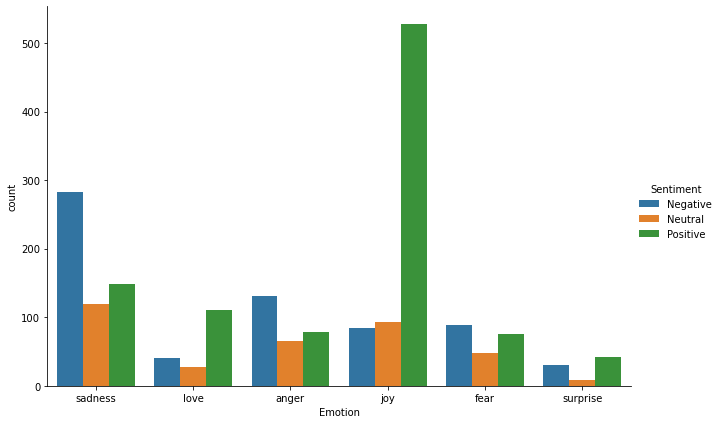

In [19]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


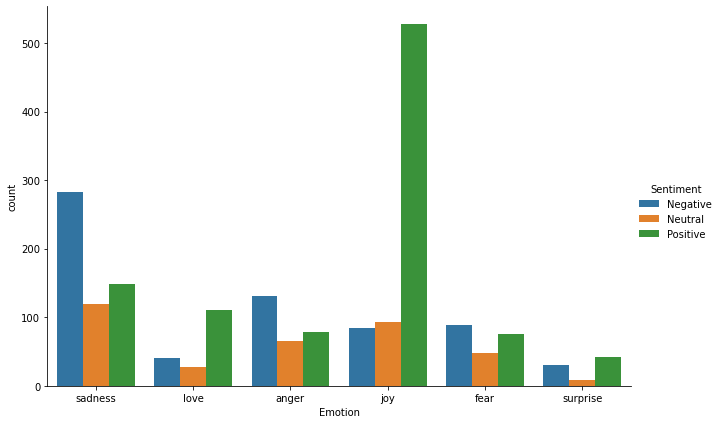

In [20]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

In [21]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [23]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [24]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [25]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,im feeling quite sad and sorry for myself but ...,im feeling sad sorry ill snap soon
1,i feel like i am still looking at a blank canv...,feel like looking blank canvas blank pieces paper
2,i feel like a faithful servant,feel like faithful servant
3,i am just feeling cranky and blue,feeling cranky blue
4,i can have for a treat or if i am feeling festive,treat feeling festive
...,...,...
1995,im having ssa examination tomorrow in the morn...,im ssa examination tomorrow morning im prepare...
1996,i constantly worry about their fight against n...,constantly worry fight nature push limits inne...
1997,i feel its important to share this info for th...,feel important share info experience thing
1998,i truly feel that if you are passionate enough...,truly feel passionate stay true succeed


In [26]:
from collections import Counter

In [27]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [28]:
emotion_list=df["Emotion"].unique().tolist()

In [29]:
emotion_list

['sadness', 'love', 'anger', 'joy', 'fear', 'surprise']

In [30]:
joy_list=df[df['Emotion']=="joy"]['Clean_Text'].tolist()

In [31]:
joy_docx=''.join(joy_list)

In [32]:
joy_docx

'treat feeling festivestart feel appreciative godfeeling confident able care babyfeel incredibly lucky able talkfeel keen army daydribbling mums coffee table looking window feeling happystop feeling thankful compare considered lucky encounter ruthless pirates witness slaughterlunch old friend nice general im feeling energeticfeel resolvedfeel beloved preparing weddingfound past blog daily feelings emotions creative waysfeeling blessed today share close bondfeel special importantfeeling hes going way successfullove song makes feel happyfeel special draw awed admiration firefighters led charge towers rushingfeel acceptedfeel energetic excited results end weekfeel perfect facebook href http wwwhope pull tissue paper feel like sunday day cute wonderfulfeeling opted shoot photojournalistically completely prop free personal favepoint feel friendly feelings takes alot timefeel important fact individual way grievingfeel perfect height height threads picture imagesfeel ecstatic light airlie bed

In [33]:
keyword_joy=extract_keywords(joy_docx)

In [34]:
keyword_joy

{'feel': 223,
 'feeling': 163,
 'like': 113,
 'im': 44,
 'know': 34,
 'little': 28,
 'people': 27,
 'pretty': 24,
 'time': 24,
 'good': 22,
 'going': 18,
 'way': 18,
 'things': 18,
 'life': 17,
 'day': 15,
 'work': 15,
 'better': 15,
 'need': 15,
 'happy': 14,
 'feels': 13,
 'dont': 13,
 'excited': 12,
 'love': 12,
 'new': 12,
 'ive': 12,
 'want': 12,
 'sure': 11,
 'super': 11,
 'strong': 11,
 'able': 10,
 'special': 10,
 'energetic': 10,
 'free': 10,
 'think': 10,
 'year': 10,
 'right': 10,
 'old': 9,
 'feelings': 9,
 'share': 9,
 'end': 9,
 'href': 9,
 'http': 9,
 'cute': 9,
 'cool': 9,
 'change': 9,
 'content': 9,
 'family': 9,
 'confident': 8,
 'lucky': 8,
 'thankful': 8}

In [35]:
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} most common keywords".format(emotion_name))
    sns.barplot(x="token",y="count",data=df_01)
    plt.xticks(rotation=45)
    plt.show()

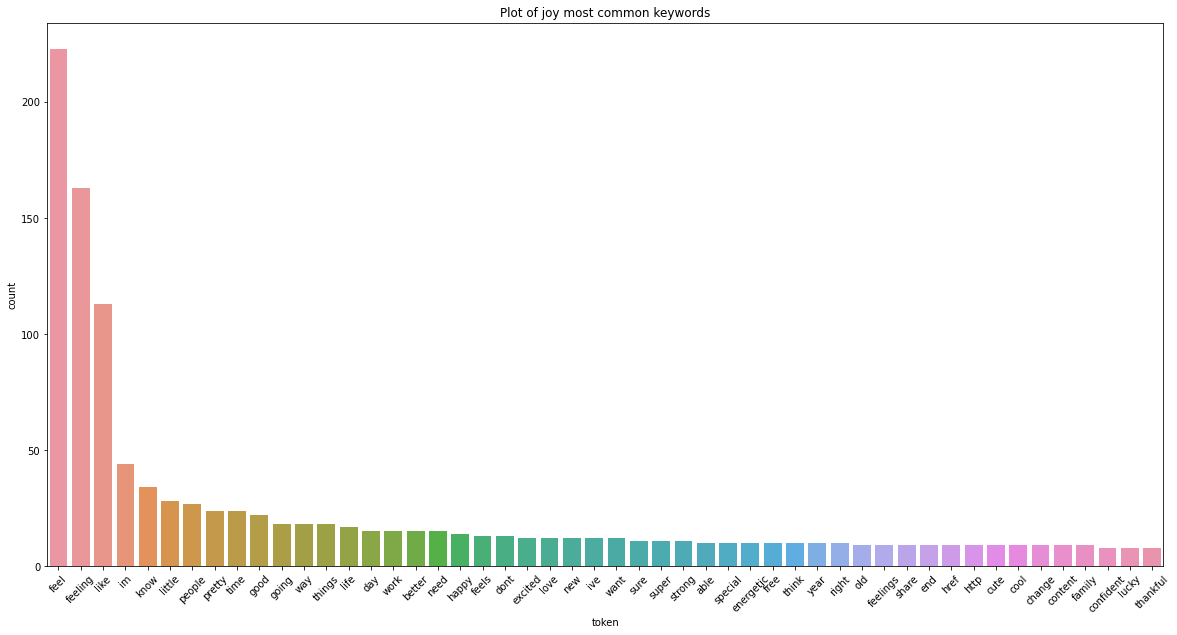

In [36]:
plot_most_common_words(keyword_joy,"joy")

In [37]:
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)
keyword_surprise=extract_keywords(surprise_docx)

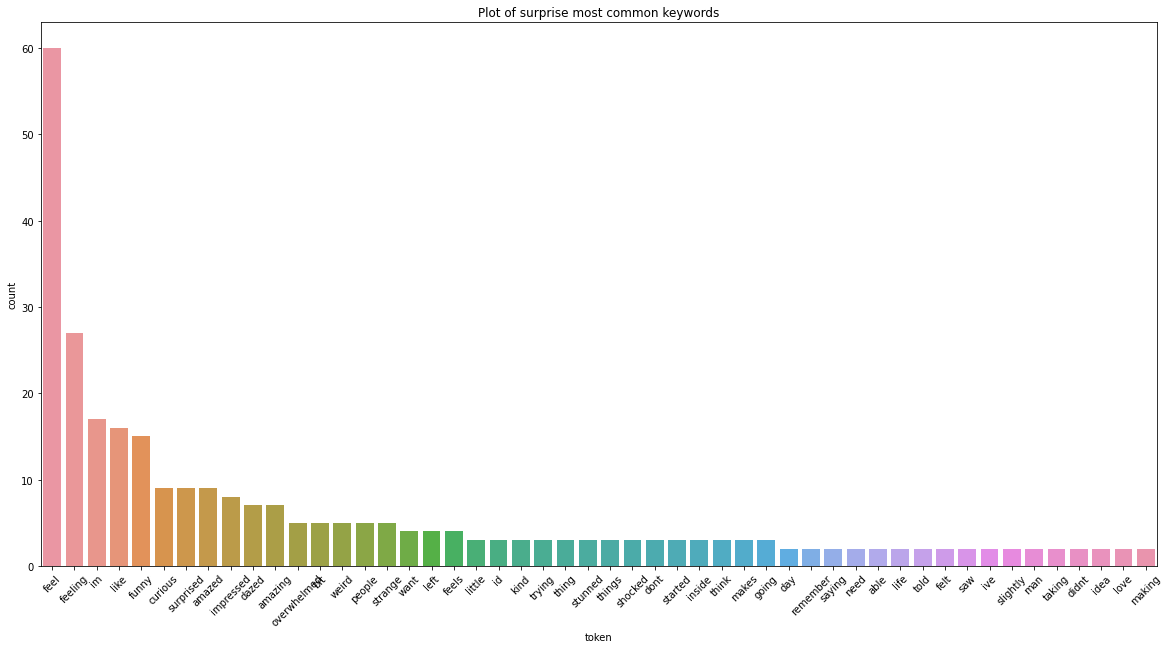

In [38]:
plot_most_common_words(keyword_surprise,"surprise")

In [39]:
from wordcloud import WordCloud

In [40]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

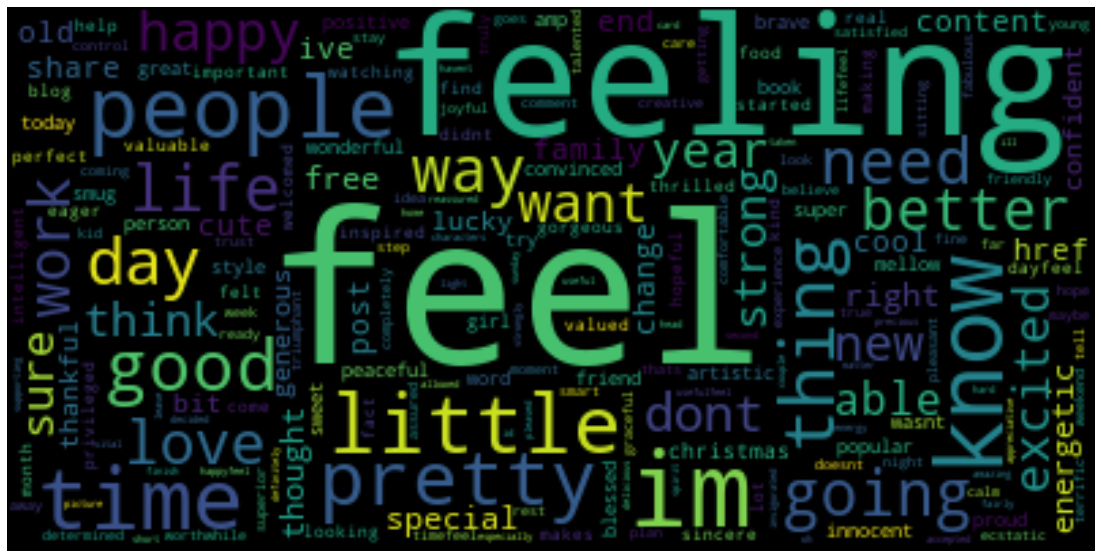

In [41]:
plot_wordcloud(joy_docx)

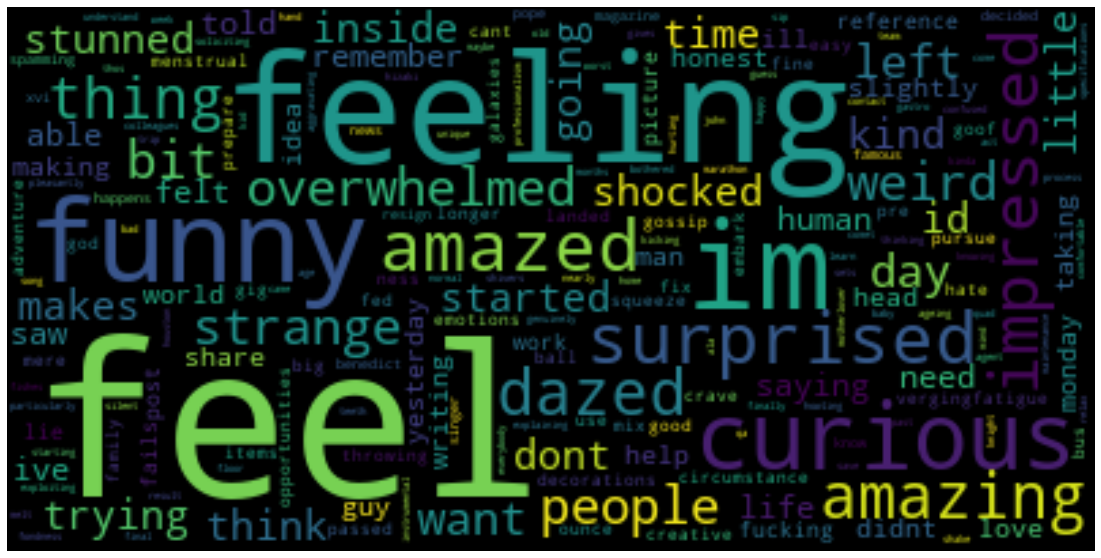

In [42]:
plot_wordcloud(surprise_docx)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [46]:
Xfeatures

0                      im feeling sad sorry ill snap soon
1       feel like looking blank canvas blank pieces paper
2                              feel like faithful servant
3                                     feeling cranky blue
4                                   treat feeling festive
                              ...                        
1995    im ssa examination tomorrow morning im prepare...
1996    constantly worry fight nature push limits inne...
1997           feel important share info experience thing
1998              truly feel passionate stay true succeed
1999                      feel like wanna buy cute online
Name: Clean_Text, Length: 2000, dtype: object

In [47]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [48]:
cv.get_feature_names()

['abandon',
 'abandoning',
 'ability',
 'abit',
 'able',
 'absolute',
 'absolutely',
 'absorption',
 'absurd',
 'abuse',
 'abused',
 'abyss',
 'academics',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accomplished',
 'accomplishing',
 'accomplishment',
 'according',
 'accurately',
 'accuses',
 'ache',
 'achieve',
 'achieved',
 'achievements',
 'aching',
 'achy',
 'acid',
 'acknowledged',
 'acquainted',
 'acquired',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'activities',
 'actress',
 'acts',
 'actual',
 'actually',
 'acutely',
 'add',
 'addiction',
 'adding',
 'addition',
 'adjoining',
 'admiration',
 'admire',
 'admired',
 'admissions',
 'admit',
 'admitted',
 'admitting',
 'adopted',
 'adopting',
 'adorable',
 'adore',
 'adored',
 'adrenaline',
 'adrian',
 'adsense',
 'adult',
 'adults',
 'advance',
 'advantage',
 'adventure',
 'adventurous',
 'advertorial',
 'adverts',
 'advise',
 'advocating',
 'af',
 'afar',
 'affect',
 

In [49]:
# X.toarray()

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [51]:
nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [52]:
nv_model.score(X_test,y_test)

0.6116666666666667

In [53]:
y_pred_for_nv= nv_model.predict(X_test)

In [54]:
y_pred_for_nv

array(['joy', 'joy', 'joy', 'sadness', 'joy', 'sadness', 'sadness',
       'sadness', 'joy', 'joy', 'joy', 'joy', 'joy', 'sadness', 'fear',
       'joy', 'joy', 'joy', 'joy', 'sadness', 'joy', 'sadness', 'joy',
       'joy', 'joy', 'sadness', 'sadness', 'joy', 'joy', 'joy', 'joy',
       'joy', 'sadness', 'sadness', 'sadness', 'anger', 'anger',
       'sadness', 'sadness', 'sadness', 'anger', 'joy', 'joy', 'sadness',
       'joy', 'joy', 'sadness', 'sadness', 'anger', 'anger', 'sadness',
       'joy', 'sadness', 'joy', 'joy', 'joy', 'sadness', 'anger',
       'sadness', 'joy', 'anger', 'joy', 'sadness', 'sadness', 'joy',
       'sadness', 'joy', 'joy', 'joy', 'sadness', 'joy', 'joy', 'joy',
       'anger', 'anger', 'surprise', 'sadness', 'joy', 'sadness', 'joy',
       'sadness', 'joy', 'sadness', 'sadness', 'sadness', 'joy',
       'sadness', 'sadness', 'sadness', 'fear', 'sadness', 'anger', 'joy',
       'joy', 'joy', 'joy', 'joy', 'joy', 'sadness', 'joy', 'joy',
       'sadness', 'a

In [55]:
sample_text=['I love Divya so much']

In [56]:
vect=cv.transform(sample_text).toarray()

In [57]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [58]:
nv_model.predict_proba(vect)

array([[0.08036419, 0.02397548, 0.5980996 , 0.11039197, 0.17560876,
        0.01155999]])

In [59]:
nv_model.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [60]:
np.max(nv_model.predict_proba(vect))

0.5980995973176527

In [61]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{},Prediction score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [62]:
predict_emotion(sample_text,nv_model)

Prediction:joy,Prediction score:0.5980995973176527


{'anger': 0.08036419474772107,
 'fear': 0.023975483865711775,
 'joy': 0.5980995973176527,
 'love': 0.11039196740474498,
 'sadness': 0.17560876395189415,
 'surprise': 0.011559992712274973}

In [63]:
predict_emotion(["He hates divya's some habets"],nv_model)

Prediction:joy,Prediction score:0.35285714285714287


{'anger': 0.14571428571428563,
 'fear': 0.09785714285714285,
 'joy': 0.35285714285714287,
 'love': 0.08214285714285713,
 'sadness': 0.27928571428571425,
 'surprise': 0.04214285714285714}

In [64]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.69      0.54      0.60        71
        fear       0.59      0.13      0.22        75
         joy       0.58      0.85      0.69       210
        love       0.67      0.06      0.12        63
     sadness       0.64      0.85      0.73       159
    surprise       1.00      0.05      0.09        22

    accuracy                           0.61       600
   macro avg       0.69      0.41      0.41       600
weighted avg       0.63      0.61      0.55       600



In [65]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 38,   0,  20,   0,  13,   0],
       [  8,  10,  37,   0,  20,   0],
       [  5,   3, 179,   1,  22,   0],
       [  3,   0,  43,   4,  13,   0],
       [  1,   3,  19,   1, 135,   0],
       [  0,   1,  11,   0,   9,   1]], dtype=int64)

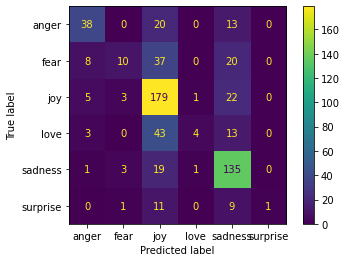

In [66]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [67]:
import joblib

In [68]:
model_file=open("val.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [69]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [70]:
lr_model.score(X_test,y_test)

0.6966666666666667

In [71]:
predict_emotion(sample_text,lr_model)

Prediction:joy,Prediction score:0.44760519668607707


{'anger': 0.16691887488540944,
 'fear': 0.08899067182618958,
 'joy': 0.44760519668607707,
 'love': 0.14401321325217445,
 'sadness': 0.13565300618744774,
 'surprise': 0.016819037162701646}

In [72]:
import eli5

In [73]:
eli5.show_weights(lr_model,top=20)

In [74]:
class_names=ylabels.unique().tolist()

In [75]:
feature_names=cv.get_feature_names()

In [76]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)